In [1]:
from AMAT.telecom import Link, Schedule
from AMAT.approach import Approach
from AMAT.orbiter import PropulsiveOrbiter
from AMAT.visibility import LanderToPlanet, LanderToOrbiter, OrbiterToPlanet
import numpy as np

In [2]:
# DTE
visibility1 = LanderToPlanet(observer_planet="TITAN", target_planet="EARTH", latitude=3.0, date="2034-03-28 00:00:00", ephem_file='../../spice-data/de432s.bsp')
link1 = Link(freq=8.425, Pt=30, Gt_dBi=30, Gr_dBi=80.0, Ts=40.5, range_km=1.5E9, L_other_dB=0.54, rate_kbps=2.00, Eb_N0_req=0.31)
schedule1 = Schedule(86400*16, 101, [np.array([4*86400, 5*86400]), np.array([6*86400, 7*86400]), np.array([8*86400, 9*86400]), np.array([10*86400, 11*86400])])

In [3]:
link1.compute_data_volume(visibility1, schedule1)

In [4]:
import matplotlib.pyplot as plt

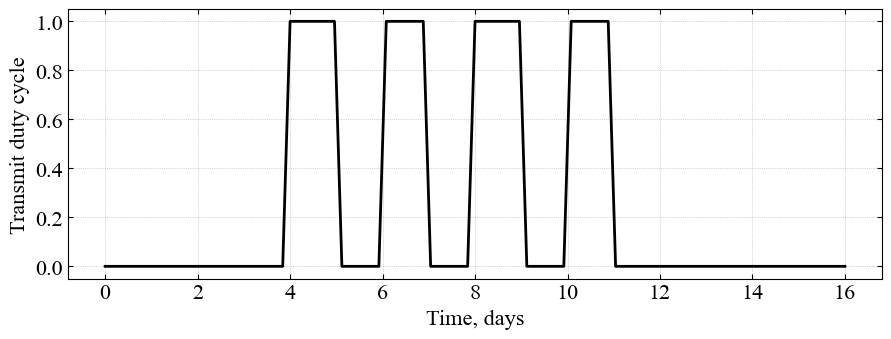

In [5]:
plt.figure(figsize=(10.5, 3.5))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.plot(link1.t_array/86400, link1.schedule.transmit_array, 'k-', linewidth=2.0)


plt.ylabel('Transmit duty cycle',fontsize=16)
plt.xlabel('Time, days',fontsize=16)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=16)
ax.tick_params(axis='y',labelsize=16)
plt.grid(linestyle='dotted', linewidth=0.5)

plt.savefig('../../data/joaaa-titan-orbiter/dte-duty-cycle.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../data/joaaa-titan-orbiter/dte-duty-cycle.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../data/joaaa-titan-orbiter/dte-duty-cycle.eps', dpi=300,bbox_inches='tight')
plt.show()

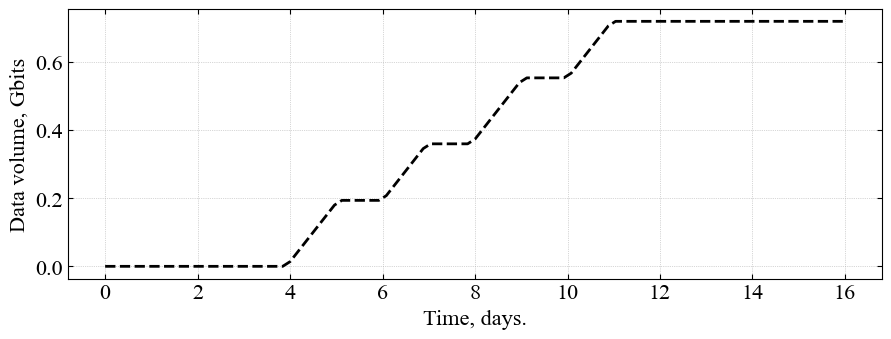

In [6]:
plt.figure(figsize=(10.5, 3.5))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.plot(link1.t_array/86400, link1.data_volume_array/1e9, 'k--', linewidth=2.0)


plt.xlabel('Time, days.',fontsize=16)
plt.ylabel('Data volume, Gbits',fontsize=16)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=16)
ax.tick_params(axis='y',labelsize=16)
plt.grid(linestyle='dotted', linewidth=0.5)

plt.savefig('../../data/joaaa-titan-orbiter/dte-data-volume.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../data/joaaa-titan-orbiter/dte-data-volume.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../data/joaaa-titan-orbiter/dte-data-volume.eps', dpi=300,bbox_inches='tight')
plt.show()

In [7]:
# lander to orbiter
approach = Approach("TITAN", v_inf_vec_icrf_kms=np.array([-0.910, 5.081, 4.710]), rp=(2575+1700) * 1e3, psi=1.05*np.pi)
orbiter = PropulsiveOrbiter(approach=approach, apoapsis_alt_km=1700)
visibility2 = LanderToOrbiter(planet="TITAN", latitude=3.00, orbiter=orbiter, t_seconds=86400*16, num_points=2001)
link2 =  Link(freq=7.7, Pt=30, Gt_dBi=30, Gr_dBi=32.0, Ts=230, range_km=10E3, La_dB=0.05, L_other_dB=3.3, rate_kbps=10000, Eb_N0_req=2.55)
schedule2 = Schedule(86400*16, 2001, [np.array([0, 86400*16])])

In [8]:
link2.compute_data_volume(visibility2, schedule2)

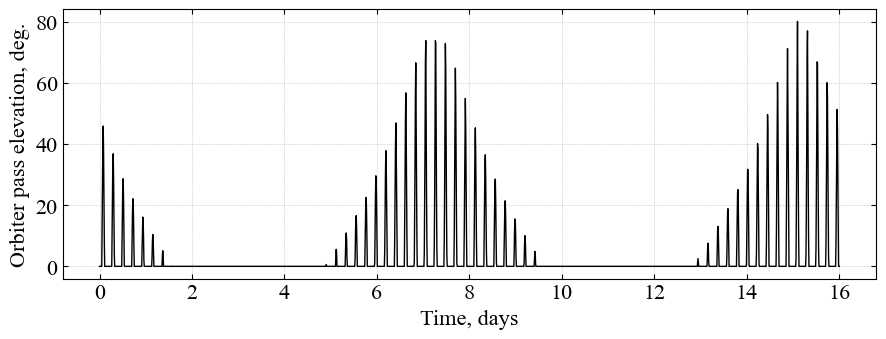

In [9]:
plt.figure(figsize=(10.5, 3.5))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.plot(link2.t_array/86400, link2.visibility.elevation_array, 'k-', linewidth=1.0)


plt.xlabel('Time, days',fontsize=16)
plt.ylabel('Orbiter pass elevation, deg.',fontsize=16)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=16)
ax.tick_params(axis='y',labelsize=16)
plt.grid(linestyle='dotted', linewidth=0.5)

plt.savefig('../../data/joaaa-titan-orbiter/lander-to-orbiter-visibility.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../data/joaaa-titan-orbiter/lander-to-orbiter-visibility.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../data/joaaa-titan-orbiter/lander-to-orbiter-visibility.eps', dpi=300,bbox_inches='tight')
plt.show()

In [10]:
# orbiter to Earth
visibility3 = OrbiterToPlanet(target_planet="EARTH", observer_planet="TITAN",orbiter=orbiter, date="2034-03-28 00:00:00", t_seconds=86400*16, num_points=2001, ephem_file='../../spice-data/de432s.bsp')
link3 = Link(freq=32.00, Pt=30, Dt=4.0, eta_t=0.60, Gr_dBi=79.83, Ts=48.0, range_km=1.5E9, L_other_dB=0.50, rate_kbps=200, Eb_N0_req=0.31)
schedule3 = Schedule(86400*16, 2001, [np.array([0, 86400*16])])
link3.compute_data_volume(visibility3, schedule3)

In [11]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

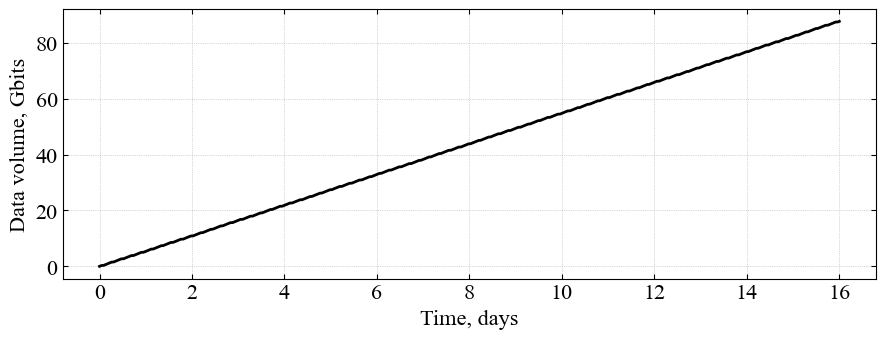

In [12]:
plt.figure(figsize=(10.5, 3.5))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.plot(link3.t_array/86400, link3.data_volume_array*0.40/1e9, 'k-', linewidth=2.0)


plt.xlabel('Time, days',fontsize=16)
plt.ylabel('Data volume, Gbits',fontsize=16)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=16)
ax.tick_params(axis='y',labelsize=16)
plt.grid(linestyle='dotted', linewidth=0.5)


plt.savefig('../../data/joaaa-titan-orbiter/orbiter-data-volume.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../data/joaaa-titan-orbiter/orbiter-data-volume.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../data/joaaa-titan-orbiter/orbiter-data-volume.eps', dpi=300,bbox_inches='tight')

plt.show()